In [1]:
import os,sys, re
from importlib import reload
import numpy as np
import pandas as pd
from Bio.Seq import reverse_complement
#import torch
print(os.getpid())
sys.path.append(r'C:\Softwares\Github\MerScope01')

from ChromAn.src.library_tools.primers import load_fasta_to_DataFrame
#import MERFISH_probe_design.probe_design.OTTable_dict as ot

53672


In [2]:
from ChromAn.src.file_io.data_organization import Color_Usage, search_fovs_in_folders, color_usage_kwds

In [3]:
import ChromAn
reload(ChromAn.src.file_io.data_organization)
from ChromAn.src.file_io.data_organization import Data_Organization, search_fovs_in_folders
from ChromAn.src.file_io.dax_process import DaxProcesser
from ChromAn.src.visual_tools.interactive import imshow_mark_3d

In [4]:
# where the original data saves
data_folder = r'\\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\msBrain\20230513-wtBrain_MO4_MERFISH_s'
# Color usage file marks the organization of imaging files
color_usage_filename = r'\\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\msBrain\20230513-wtBrain_MO4_MERFISH_s\Analysis\Color_Usage.csv'

In [5]:
# visualize some images:
folders, fovs = search_fovs_in_folders(data_folder)
sel_fov = 10

test_ref_filename = os.path.join(folders[0], fovs[sel_fov])
test_filename = os.path.join(folders[1], fovs[sel_fov])
# load ref
daxp_ref = DaxProcesser(test_ref_filename)
daxp_ref._load_image()
daxp_ref._corr_hot_pixels()
# load
daxp = DaxProcesser(test_filename)
daxp._load_image()
daxp_ref._corr_hot_pixels()

- searching in folder: \\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\msBrain\20230513-wtBrain_MO4_MERFISH_s
-- 20 folders, 173 fovs detected.
Initialize DaxProcesser for file:\\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\msBrain\20230513-wtBrain_MO4_MERFISH_s\H0M1\Conv_zscan_010.dax
- New save file: \\wi-bigdata.wi.mit.edu\weissman_imaging\puzheng\msBrain\20230513-wtBrain_MO4_MERFISH_s\H0M1\Conv_zscan_010_processed.hdf5
-- all used channels: ['750', '647', '488', '405']
-- single image size: [  13 2048 2048]
- Loaded images for channels:['750', '647', '488', '405'] in 1.558s.
- Correct hot_pixel for channels: ['750', '647', '488', '405']
-- Keep channels: ['750', '647', '488', '405'] for corr_hot_pixel.
- Start hot_pixel correction for channels:['750', '647', '488', '405'].
-- corrected hot_pixel for channel 750 in 0.929s.
-- corrected hot_pixel for channel 647 in 0.917s.
-- corrected hot_pixel for channel 488 in 0.956s.
-- corrected hot_pixel for channel 405 in 0.906s.
- Finishe

### Quickly visualize bead image to find bead-localizing z-frame

<IPython.core.display.Javascript object>


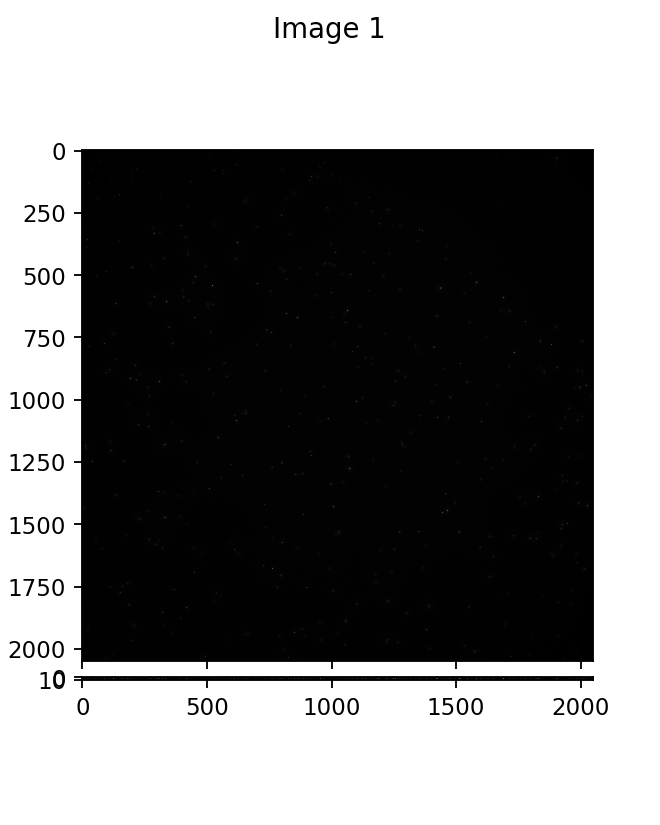

In [6]:
%matplotlib notebook
imshow_mark_3d([daxp.im_488, daxp_ref.im_488],)

In [7]:
ref_Zstep = 8 # start from 0, manually check several images

In [10]:
# Generate data organization
data_organization_filename = r'Z:\Softwares\Weissman_MERFISH_Scripts\merlin_parameters\dataorganization\20230513-MO4_38bit.csv'
_do = Data_Organization(data_organization_filename,)
if _do.is_empty():
    _do.create_from_colorUsage(color_usage_filename, data_folder,ref_Zstep)
    _do.save_to_file()

- load color_usage from file: Z:\Softwares\Weissman_MERFISH_Scripts\merlin_parameters\dataorganization\20230513-MO4_38bit.csv


In [11]:
_do

,channelName,readoutName,imageType,imageRegExp,bitNumber,imagingRound,color,frame,zPos,fiducialImageType,fiducialRegExp,fiducialImagingRound,fiducialFrame,fiducialColor
0,bit1,RS0015,750_647_488_405_s13,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,1,0,750,[0 4 8 12 16 20 24 28 32 36 40 44 48],[0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 ...,750_647_488_405_s13,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,0,34,488
1,bit2,RS0083,750_647_488_405_s13,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,2,0,647,[1 5 9 13 17 21 25 29 33 37 41 45 49],[0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 ...,750_647_488_405_s13,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,0,34,488
2,bit3,RS0095,750_647_488_s13,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,3,1,750,[0 3 6 9 12 15 18 21 24 27 30 33 36],[0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 ...,750_647_488_s13,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,1,26,488
3,bit4,RS0109,750_647_488_s13,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,4,1,647,[1 4 7 10 13 16 19 22 25 28 31 34 37],[0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 ...,750_647_488_s13,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,1,26,488
4,bit5,RS0175,750_647_488_s13,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,5,2,750,[0 3 6 9 12 15 18 21 24 27 30 33 36],[0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 ...,750_647_488_s13,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,2,26,488
5,bit6,RS0237,750_647_488_s13,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,6,2,647,[1 4 7 10 13 16 19 22 25 28 31 34 37],[0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 ...,750_647_488_s13,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,2,26,488
6,bit7,RS0247,750_647_488_s13,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,7,3,750,[0 3 6 9 12 15 18 21 24 27 30 33 36],[0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 ...,750_647_488_s13,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,3,26,488
7,bit8,RS0255,750_647_488_s13,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,8,3,647,[1 4 7 10 13 16 19 22 25 28 31 34 37],[0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 ...,750_647_488_s13,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,3,26,488
8,bit9,RS0307,750_647_488_s13,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,9,4,750,[0 3 6 9 12 15 18 21 24 27 30 33 36],[0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 ...,750_647_488_s13,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,4,26,488
9,bit10,RS0332,750_647_488_s13,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,10,4,647,[1 4 7 10 13 16 19 22 25 28 31 34 37],[0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 ...,750_647_488_s13,(?P<imageType>[\w|-]+)_(?P<fov>[0-9]+)_(?P<ima...,4,26,488
